In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
!ls /content/drive/MyDrive

'2022 PYQ Paper -  Modern Communication Systems PYQ Paper For Sem VI Uploaded By Navdeep Raghav(DU Academic Corner) (1).pdf'
'2022 PYQ Paper -  Modern Communication Systems PYQ Paper For Sem VI Uploaded By Navdeep Raghav(DU Academic Corner) (2).pdf'
'2022 PYQ Paper -  Modern Communication Systems PYQ Paper For Sem VI Uploaded By Navdeep Raghav(DU Academic Corner) (3).pdf'
'2022 PYQ Paper -  Modern Communication Systems PYQ Paper For Sem VI Uploaded By Navdeep Raghav(DU Academic Corner).pdf'
 Chart_2025-07-04_Saksham.pdf
 Classroom
'Colab Notebooks'
 DriveFire
 ds_saksham_tyagi
 GDToT
 HubDrive
 IMG_20230409_112110.jpg
 IMG-20250117-WA0000.jpg
 inbound215768329812251006.jpg
 Saksham_Tyagi_Resume.pdf


In [74]:
df_fear = pd.read_csv('/content/drive/MyDrive/ds_saksham_tyagi/csv_files/fear_greed_index.csv')
df_hist = pd.read_csv('/content/drive/MyDrive/ds_saksham_tyagi/csv_files/historical_data.csv')

In [75]:
df_fear.head(20)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [76]:
df_fear.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [78]:
df_fear['date'] = pd.to_datetime(df_fear['date'])
df_fear['timestamp'] = pd.to_datetime(df_fear['timestamp'], unit='s')

In [80]:
sentiment_map = {
    'Extreme Fear' : 0,
    'Fear' : 1,
    'Neutral' : 2,
    'Greed' : 3,
    'Extreme Greed' : 4
}

In [81]:
df_fear['sentiment_score'] = df_fear['classification'].map(sentiment_map)

In [82]:
df_fear.rename(columns={'date':'sentiment_date'}, inplace=True)

In [83]:
df_fear1 = df_fear[['sentiment_date','classification', 'sentiment_score']]
df_fear1.head()

,sentiment_date,classification,sentiment_score
0,2018-02-01,Fear,1
1,2018-02-02,Extreme Fear,0
2,2018-02-03,Fear,1
3,2018-02-04,Extreme Fear,0
4,2018-02-05,Extreme Fear,0


In [84]:
df_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [85]:
df_hist['Timestamp IST'] = pd.to_datetime(df_hist['Timestamp IST'], format = '%d-%m-%Y %H:%M')

In [87]:
df_hist['Trade_date'] = df_hist['Timestamp IST'].dt.date
df_hist['Trade_date'] = pd.to_datetime(df_hist['Trade_date'], format = '%d-%m-%y')

In [88]:
df_hist1 = df_hist[['Account', 'Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','Trade_date']]

In [89]:
df_hist1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,Trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02


In [90]:
print(df_hist1.dtypes)

Account                    object
Coin                       object
Execution Price           float64
Size Tokens               float64
Size USD                  float64
Side                       object
Closed PnL                float64
Direction                  object
Trade_date         datetime64[ns]
dtype: object


In [91]:
merged_df = pd.merge(
    df_hist1,
    df_fear1,
    left_on = 'Trade_date',
    right_on='sentiment_date',
    how = 'left'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,Trade_date,sentiment_date,classification,sentiment_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,Extreme Greed,4.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,Extreme Greed,4.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,Extreme Greed,4.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,Extreme Greed,4.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,Extreme Greed,4.0


In [92]:
total_trades = len(merged_df)
matched_sentiment = merged_df['sentiment_score'].notna().sum()
unmatched_sentiment = total_trades - matched_sentiment
print(f"Total trades: {total_trades}")
print(f"Matched sentiment: {matched_sentiment}")
print(f"Unmatched_sentiment: {unmatched_sentiment}")

Total trades: 211224
Matched sentiment: 211218
Unmatched_sentiment: 6


In [93]:
merged_df.to_csv('/content/drive/MyDrive/ds_saksham_tyagi/csv_files/merged_data.csv', index=False)

In [94]:
merged_df['PnL_bin'] = merged_df['Closed PnL'].apply(lambda x: 'Profit' if x>0 else ('Loss' if x<0 else 'Zero'))

In [95]:
merged_df['Side_Binary'] = merged_df['Side'].apply(lambda x : 1 if str(x).upper() == 'BUY' else 0)

merged_df['Trade_Imapct'] = merged_df['Size USD']

merged_df['Closed_PnL_Numeric'] = df_hist1['Closed PnL']
merged_df['Normalized_PnL'] = merged_df.apply(
    lambda row : row['Closed_PnL_Numeric'] / row['Size USD'] if row['Size USD'] else 0, axis=1
)

merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')
avg_trade_size = merged_df.groupby('classification')['Size USD'].mean()


In [96]:
merged_df[['Account', 'Trade_date', 'Side', 'Side_Binary', 'Size USD',
           'Closed PnL', 'PnL_bin', 'Trade_Imapct', 'Normalized_PnL','classification']].head()

,Account,Trade_date,Side,Side_Binary,Size USD,Closed PnL,PnL_bin,Trade_Imapct,Normalized_PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,7872.16,0.0,Zero,7872.16,0.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,127.68,0.0,Zero,127.68,0.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1150.63,0.0,Zero,1150.63,0.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1142.04,0.0,Zero,1142.04,0.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,69.75,0.0,Zero,69.75,0.0,Extreme Greed


In [97]:
daily_account_stats = merged_df.groupby(['Account', 'Trade_date', 'classification', 'sentiment_score']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': ['sum', 'mean'],
    'Side_Binary': 'mean',
    'PnL_bin': lambda x: (x == 'Profit').sum(),
    'Account': 'count'
}).reset_index()

daily_account_stats.columns = [
    'Account', 'Trade_date', 'classification', 'sentiment_score',
    'Total_PnL', 'Avg_PnL',
    'Total_Trade_Size', 'Avg_Trade_Size',
    'Buy_Ratio',
    'Profit_Trades',
    'Total_Trades'
]

daily_account_stats['Profit_Rate'] = daily_account_stats['Profit_Trades'] / daily_account_stats['Total_Trades']
daily_account_stats.head()

,Account,Trade_date,classification,sentiment_score,Total_PnL,Avg_PnL,Total_Trade_Size,Avg_Trade_Size,Buy_Ratio,Profit_Trades,Total_Trades,Profit_Rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,4.0,0.0,0.000000,900880.13,5089.718249,0.000000,0,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,4.0,0.0,0.000000,542413.18,7976.664412,0.000000,0,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,4.0,0.0,0.000000,949380.00,23734.500000,0.000000,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,4.0,-21227.0,-1768.916667,338240.00,28186.666667,1.000000,0,12,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,4.0,1603.1,59.374074,465700.00,17248.148148,0.444444,12,27,0.444444


/tmp/ipython-input-3263724161.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm')


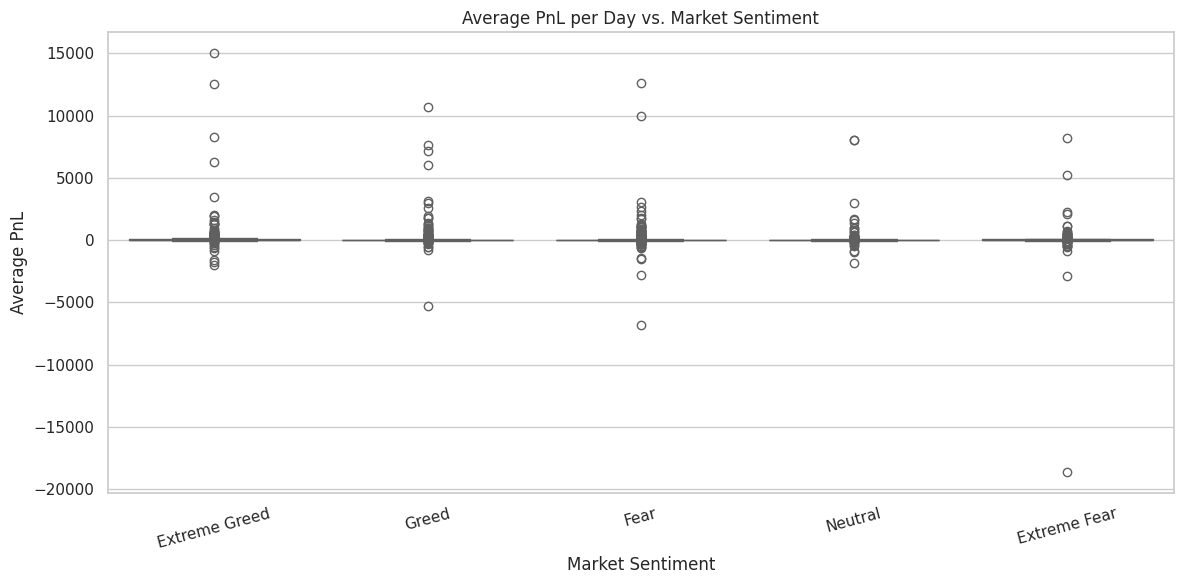

/tmp/ipython-input-3263724161.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis')


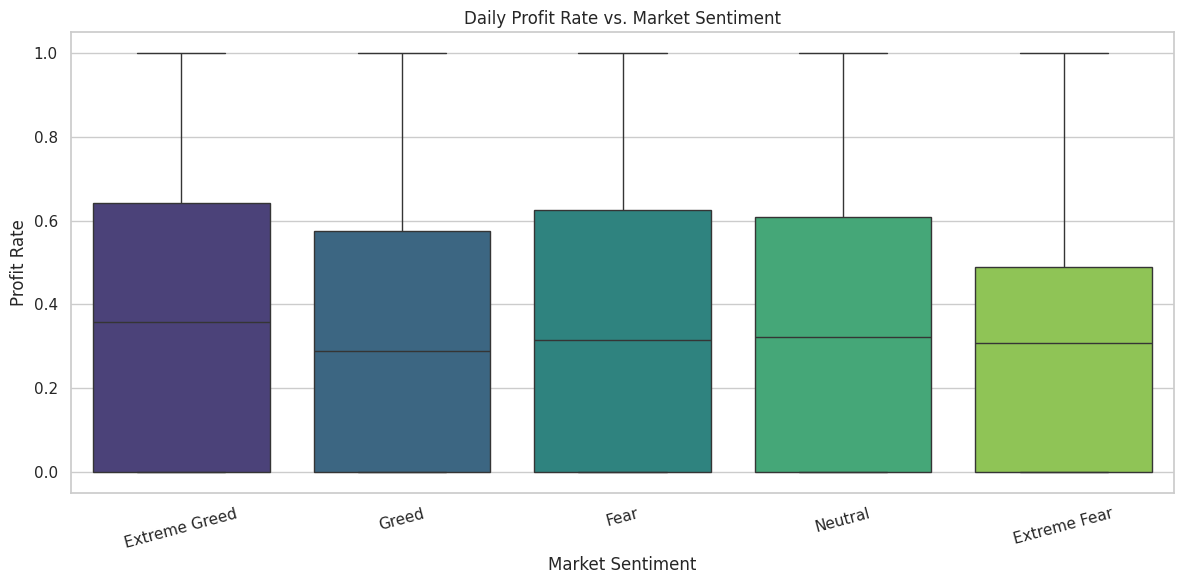

/tmp/ipython-input-3263724161.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2')


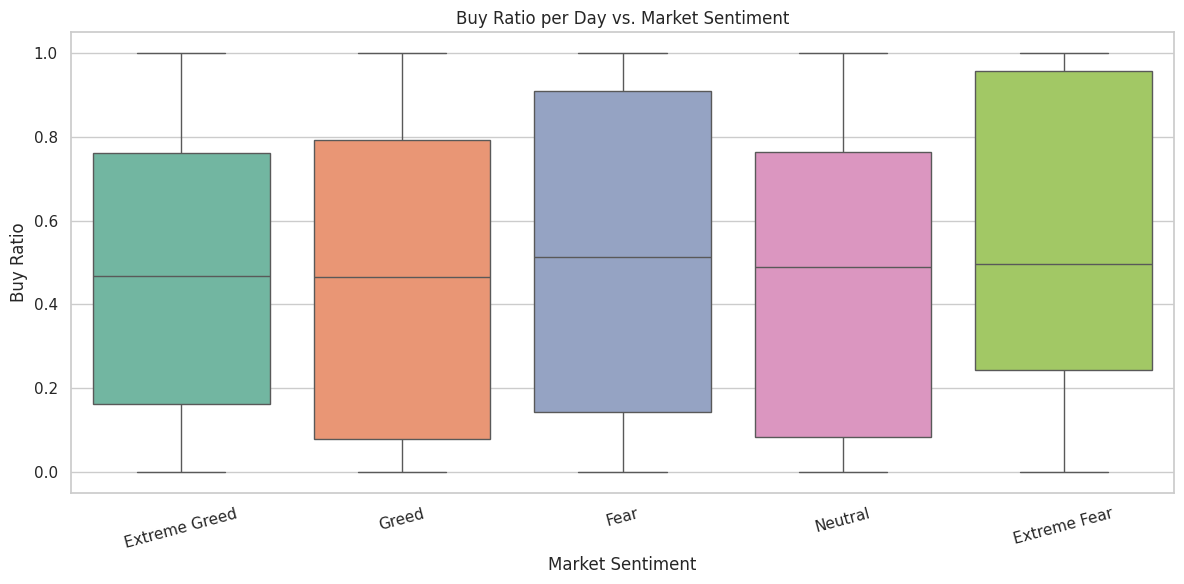

/tmp/ipython-input-3263724161.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, palette='viridis')


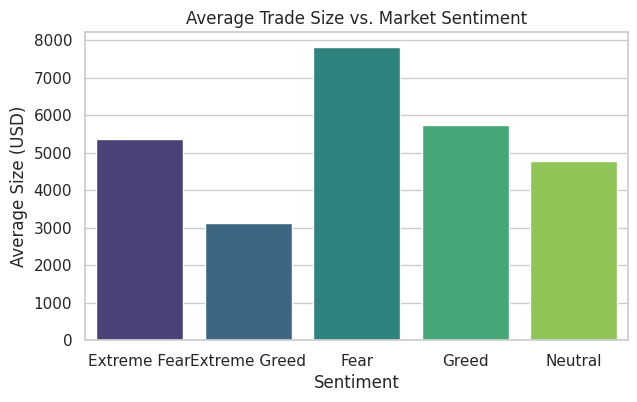

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Plot 1: Average PnL per Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm')
plt.title('Average PnL per Day vs. Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 2: Profit Rate vs. Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis')
plt.title('Daily Profit Rate vs. Market Sentiment')
plt.ylabel('Profit Rate')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 3: Buy Ratio vs. Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2')
plt.title('Buy Ratio per Day vs. Market Sentiment')
plt.ylabel('Buy Ratio')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 4: Average Trade Size vs. Sentiment Class
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, palette='viridis')
plt.title("Average Trade Size vs. Market Sentiment")
plt.ylabel("Average Size (USD)")
plt.xlabel("Sentiment")
plt.show()

In [99]:
!git clone https://github.com/saksham9908/Bitcoin-Market-Sentiment-Analysis


Cloning into 'Bitcoin-Market-Sentiment-Analysis'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [101]:
!cp -r "/content/drive/MyDrive/ds_saksham_tyagi/notebook_1.ipynb" "/content/Bitcoin-Market-Sentiment-Analysis"
